# 소상공인시장진흥공단_상가업소정보_201806

## !중요
### 버전과 한글폰트
* 한글폰트 사용하기 : http://corazzon.github.io/matplotlib_font_setting

In [1]:
# 아래의 버전에 의존성이 있습니다. 
# 다음의 버전으로 설치해 주세요.
# !pip install plotnine==0.5.0
# !pip install –upgrade pandas==0.23.4
# !pip install folium==0.5.0

* https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
# Window에서는 dir을 사용합니다.
%ls data/shop_201806/

shop_201806_01.csv* shop_201806_02.csv* shop_201806_03.csv* shop_201806_04.csv*


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from plotnine import *
import folium

In [4]:
shop_2018 = pd.read_csv('data/shop_201806/shop_201806_01.csv', encoding='cp949')
shop_2018.head()

상가업소번호          상호명      지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  28523551  엘가커피부산아시아드점  부산아시아드점         Q       음식       Q12    커피점/카페   
1  28498271    비비안아울렛중계점   아울렛중계점         D       소매       D05      의복의류   
2  28512174  연세정신건강의학과의원      NaN         S       의료       S01        병원   
3  28499926  독일지멘스보청기은평점      은평점         D       소매       D20  의약/의료품소매   
4  28490321         서울모드      NaN         Q       음식       Q12    커피점/카페   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드    ...                         건물관리번호  \
0    Q12A01  커피전문점/카페/다방   I56220    ...      2647010100111980000009422   
1    D05A07     셔츠/내의/속옷      NaN    ...      1135010600105090000010511   
2    S01B99         기타병원      NaN    ...      1111017400102990000005842   
3    D20A02        보청기판매   G47812    ...      1138010300102810108040063   
4    Q12A01  커피전문점/카페/다방   I56220    ...      1168010700105170027011767   

               건물명                  도로명주소   구우편번호    신우편번호  동정보 층정보  호정보  \
0  부산아시아드주경기장노외주차장     부산광역시 연제구 종합운동장로 7  611070  47500.0  NaN   1  NaN   
1          2001아울렛  서울특별시 노원구 동일로204가길 46  139726   1783.0  NaN   3  NaN   
2            유림문화사     서울특별시 종로구 종로 335-3  110540   3104.0  NaN   2  NaN   
3              NaN      서울특별시 은평구 통일로 732  122040   3368.0  NaN   2  NaN   
4             SM빌딩   서울특별시 강남구 도산대로11길 29  135888   6034.0  NaN   1  NaN   

           경도         위도  
0  129.062034  35.191284  
1  127.067888  37.641280  
2  127.014500  37.573196  
3  126.929871  37.610888  
4  127.022212  37.519315  

[5 rows x 39 columns]

In [5]:
shop_2018.shape

(476183, 39)

In [6]:
coffee = shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(18759, 39)

In [7]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [8]:
# 상호명으로 봤을 때 커피점이 12472개가 있다.
coffee['상호명'].unique().shape

(13472,)

In [9]:
coffee.loc[coffee['상호명'].str.contains('스타벅스'), '상호명'].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스가락시장역점', '스타벅스외대점',
       '스타벅스연세백양로점', '스타벅스명지대점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스압구정로데오역',
       '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점', '스타벅스삼선교점',
       '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스종각점', '스타벅스방배카페입구',
       '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스천호로데오점', '스타벅스마포일진빌딩점', '스타벅스용산역점',
       '스타벅스명동메트로', '스타벅스중계역점', '스타벅스마포아크로타워점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점', '스타벅스삼성도심공항점',
       '스타벅스부산서면', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스선릉로점',
       '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점',
       '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점', '스타벅스남산스테이트',
       '스타벅스구로하이엔드점', '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스서울교대점', '스타벅스커리학동사거리점', '스타벅스강북구청사거리점', '스타벅스청담사거리점',
       '스타

In [10]:
coffee['시도명'].isnull().sum()

0

In [11]:
# 지난 데이터와 마찬가지로 서울과 부산만 있습니다.
# 다른 지역을 참고하고 싶다면 같은 폴더에 있는 다른 파일을 참고해 주세요.
coffee['시도명'].value_counts()

서울특별시    14662
부산광역시     4097
Name: 시도명, dtype: int64

In [12]:
coffee['시군구명'].unique()

array(['연제구', '강남구', '영등포구', '중구', '서초구', '성북구', '구로구', '종로구', '도봉구',
       '마포구', '광진구', '기장군', '남구', '서대문구', '은평구', '양천구', '해운대구', '관악구',
       '성동구', '송파구', '금천구', '사상구', '동대문구', '강서구', '금정구', '동작구', '중랑구',
       '강동구', '사하구', '북구', '용산구', '노원구', '부산진구', '강북구', '수영구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

In [13]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    18759
Name: 상권업종중분류명, dtype: int64

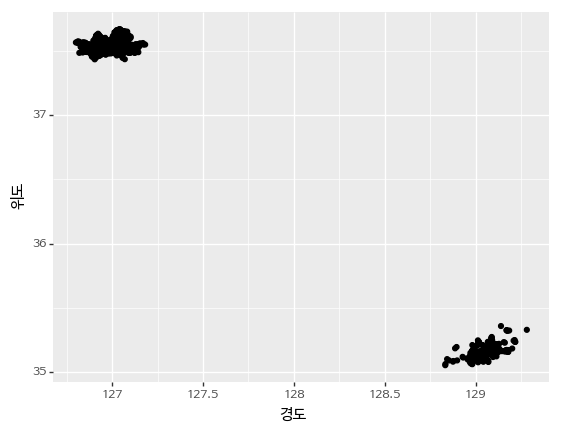

<ggplot: (-9223372036562218422)>

In [14]:
(ggplot(shop_2018[:1000])
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [15]:
df_seoul = shop_2018.loc[shop_2018['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(330089, 39)

In [16]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          285856
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19088
표준산업분류명       19088
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         62453
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        289290
건물관리번호            0
건물명          176500
도로명주소             0
구우편번호             0
신우편번호             2
동정보          305116
층정보           97585
호정보          283475
경도                0
위도                0
dtype: int64

In [17]:
df_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

In [18]:
df_seoul.describe(include=np.object)

상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
count   330089  44233    330089   330089    330089   330089    330089   
unique  233567  15087         9        9        94       94       686   
top         CU     본점         Q       음식       Q01       한식    Q01A01   
freq      1450    294    109766   109766     35778    35778     23721   

         상권업종소분류명 표준산업분류코드  표준산업분류명  ...      법정동명   대지구분명  \
count      330089   311001   311001  ...    330089  330089   
unique        686      210      210  ...       465       2   
top     한식/백반/한정식   I56111  한식 음식점업  ...       신림동      대지   
freq        23721    43878    43878  ...      6759  329735   

                        지번주소           도로명                     건물관리번호  \
count                 330089        330089                     330089   
unique                124181         11861                     124735   
top     서울특별시 종로구 종로6가 262-1  서울특별시 종로구 종로  1111016400102700003012054   
freq                     976          2352                       1008   

            건물명             도로명주소    동정보     층정보    호정보  
count    153589            330089  24973  232504  46614  
unique    25179            123973    914     115   2494  
top     동대문종합시장  서울특별시 종로구 종로 266      1       1      1  
freq       1011               995   4307  161124   5469  

[4 rows x 23 columns]

In [19]:
df_seoul[['위도', '경도']].describe(include=np.number)

위도             경도
count  330089.000000  330089.000000
mean       37.545992     126.994943
std         0.049406       0.081294
min        37.434081     126.768169
25%        37.505306     126.925013
50%        37.543243     127.009046
75%        37.574720     127.055651
max        37.692398     127.182588

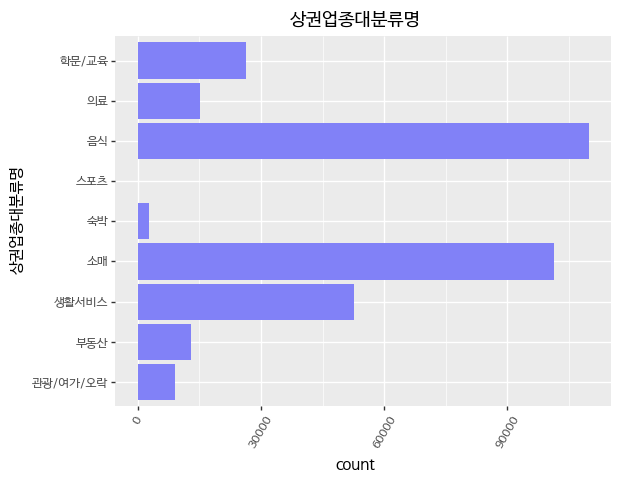

<ggplot: (292965668)>

In [20]:
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종대분류명')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [21]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(109766, 39)

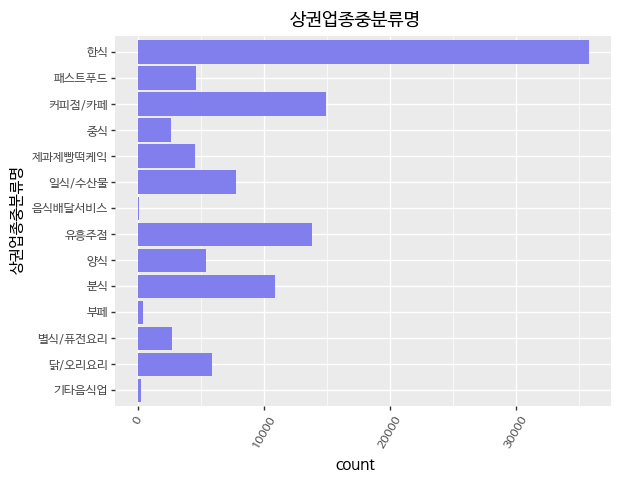

<ggplot: (-9223372036562659068)>

In [22]:
(ggplot(df_food)
 + aes('상권업종중분류명')
 + geom_bar(fill='#817FEE')
 + ggtitle('상권업종중분류명')
 + coord_flip()
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)

In [23]:
df_fast_food = df_food.loc[df_food['상권업종중분류명'] == '패스트푸드']
df_fast_food.shape

(4605, 39)

In [24]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [25]:
df_fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '배스킨라빈스', ..., '브리웰', '베이크럽', '델리'], dtype=object)

# 배스킨라빈스와 던킨도너츠 입지분석

In [26]:
df_31 = df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(438, 39)

In [27]:
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', 
               '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_31.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [28]:
df_31.head()

상호명     지점명 상권업종대분류명 상권업종중분류명                    지번주소  \
63           배스킨라빈스   관악구청점       음식    패스트푸드    서울특별시 관악구 봉천동 863-13   
1564    던킨도너츠테크노마트점  테크노마트점       음식    패스트푸드     서울특별시 광진구 구의동 546-4   
1921     던킨도너츠창동하나로     NaN       음식    패스트푸드       서울특별시 도봉구 창동 1-10   
1958  던킨도너츠용산민자역사2호     NaN       음식    패스트푸드  서울특별시 용산구 한강로3가 40-999   
2459          던킨도너츠   잠실본동점       음식    패스트푸드     서울특별시 송파구 잠실동 242-9   

                     도로명주소         위도          경도 시군구명  행정동명  
63       서울특별시 관악구 관악로 161  37.479599  126.952166  관악구   청룡동  
1564  서울특별시 광진구 광나루로56길 85  37.535713  127.095681  광진구  구의3동  
1921   서울특별시 도봉구 마들로11길 20  37.655101  127.050818  도봉구   창4동  
1958  서울특별시 용산구 한강대로21나길 7  37.527903  126.963223  용산구  한강로동  
2459   서울특별시 송파구 석촌호수로 118  37.507431  127.090005  송파구  잠실본동

In [29]:
df_31['상호명'].value_counts()

배스킨라빈스31              102
던킨도너츠                  86
배스킨라빈스                 44
던킨도넛                    4
배스킨라빈스31구의역점            1
배스킨라빈스31성수역점            1
배스킨라빈스31전농동아점           1
배스킨라빈스31건대역점            1
던킨도너츠신림양지병원점            1
던킨도너츠오목교점               1
국제흥업개발던킨도너츠용산센트럴점       1
배스킨라빈스31답십리역점           1
배스킨라빈스31성내역점            1
배스킨라빈스31구로고척점           1
던킨도너츠압구정소망              1
던킨도너츠강남역점               1
비알코리아던킨도너츠은행            1
던킨도너츠합정역사점              1
배스킨라빈스31목동이마트점          1
배스킨라빈스31신정점             1
배스킨라빈스31CAFE31광화문점      1
비알코리아던킨도너츠강남스퀘어         1
배스킨라빈스31노량진점            1
배스킨라빈스31안국역점            1
던킨도너츠동대문홈플러스            1
비알코리아던킨도너츠고대            1
던킨도너츠동대문                1
배스킨라빈스31도화점             1
배스킨라빈스31금천홈플러스점         1
던킨도너츠홍대점                1
                     ... 
던킨도너츠테크노마트점             1
배스킨라빈스31신방화역점           1
던킨도너츠김포공항국내선            1
배스킨라빈스31신정네거리점          1
던킨                      1
배스킨라빈스31개봉중앙점           1
배스킨라빈스31마포용강점           1
배스킨라빈스31수색이마

In [30]:
# 브랜드명이라는 컬럼을 새로 만들어줍니다.
df_31['브랜드명'] = ''

In [31]:
df_31[['상호명', '브랜드명']].head()

상호명 브랜드명
63           배스킨라빈스     
1564    던킨도너츠테크노마트점     
1921     던킨도너츠창동하나로     
1958  던킨도너츠용산민자역사2호     
2459          던킨도너츠

In [32]:
df_31.loc[df_31['상호명'].str.contains('배스킨'), '브랜드명'] = '배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'), '브랜드명'] = '던킨도너츠'

In [33]:
df_31[['상호명', '브랜드명']].head()

상호명    브랜드명
63           배스킨라빈스  배스킨라빈스
1564    던킨도너츠테크노마트점   던킨도너츠
1921     던킨도너츠창동하나로   던킨도너츠
1958  던킨도너츠용산민자역사2호   던킨도너츠
2459          던킨도너츠   던킨도너츠

In [34]:
df_31_group_count = df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    290
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [35]:
df_31_ratio = df_31_group_count[0]/df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배가량 많습니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 1.96배가량 많습니다.


In [36]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 63 to 476000
Data columns (total 11 columns):
상호명         438 non-null object
지점명         369 non-null object
상권업종대분류명    438 non-null object
상권업종중분류명    438 non-null object
지번주소        438 non-null object
도로명주소       438 non-null object
위도          438 non-null float64
경도          438 non-null float64
시군구명        438 non-null object
행정동명        438 non-null object
브랜드명        438 non-null object
dtypes: float64(2), object(9)
memory usage: 41.1+ KB


In [37]:
df_31['위도'] = df_31['위도'].astype(float)
df_31['경도'] = df_31['경도'].astype(float)

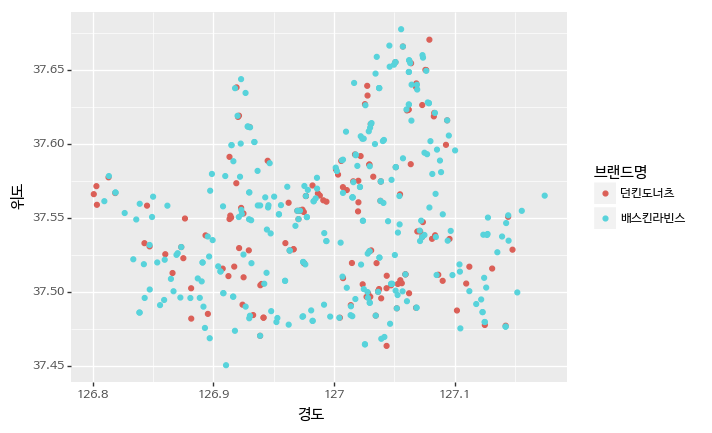

<ggplot: (-9223372036562656743)>

In [38]:
(ggplot(df_31)
 + aes(x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

## Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [39]:
# folium.Map?

In [40]:
geo_df = df_31.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'pink'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [41]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '던킨도너츠' :
        icon_color = 'red'
    else:
        icon_color = 'blue'    
    
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.features.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

# 뚜레쥬르, 파리바게뜨 매장 위치 분석

In [42]:
df_bread = df_seoul.loc[
    df_seoul['상호명'].str.contains('뚜레쥬르|파리(바게|크라상)') &
    (~df_seoul['상호명'].str.contains('파스쿠찌|잠바주스'))
].copy()
# 파스쿠찌 상호명에 파리크라상이 들어가기 때문에 파스쿠찌는 제외합니다.
df_bread.shape

(628, 39)

In [43]:
df_bread['상호명'].value_counts()

파리바게뜨               199
뚜레쥬르                122
파리크라상                11
파리바게뜨성북점              2
씨제이뚜레쥬르               2
파리바게뜨카페대학로점           2
파리바게뜨월계미성             2
파리바게뜨삼성카페점            1
파리바게뜨신풍역점             1
파리바게뜨월곡두산점            1
뚜레쥬르삼성힐스테이트점          1
뚜레쥬르숙대입구              1
뚜레쥬르신당역점              1
파리바게뜨올림픽점             1
파리바게뜨장안현대점            1
파리바게뜨외대점              1
뚜레쥬르독립문               1
파리바게뜨방학중앙점            1
파리바게뜨중랑역점             1
파리바게뜨신길돈보스코점          1
파리바게뜨학동역점             1
뚜레쥬르우이점               1
파리바게뜨온수남부점            1
뚜레쥬르배명사거리점            1
뚜레쥬르신풍역               1
뚜레쥬르대림우성점             1
방주산업뚜레쥬르광화문경희궁의       1
파리바게뜨충무로점             1
파리바게트17789위례아이파크      1
파리바게뜨목동8단지점           1
                   ... 
파리바게뜨마포합정역점           1
파리바게뜨중앙대점             1
파리바게뜨문정카페             1
파리바게트역촌2호             1
위례아이파크파리바게뜨           1
파리바게뜨번동점              1
파리바게트                 1
파리바게뜨선릉아이타워점          1
파리바게뜨한강타운점            1
파리바게뜨육사화랑회관점          1
파리바게뜨평창점        

In [44]:
df_bread.loc[df_bread['상호명'].str.contains('파리(바게|크라상)'), '브랜드명'] = '파리바게뜨'
df_bread.loc[df_bread['상호명'].str.contains('뚜레(쥬|주)르'), '브랜드명'] = '뚜레쥬르'

In [45]:
df_bread_group_count = df_bread['브랜드명'].value_counts()
df_bread_group_count

파리바게뜨    434
뚜레쥬르     194
Name: 브랜드명, dtype: int64

In [46]:
df_bread.shape

(628, 40)

In [47]:
434 + 194

628

In [48]:
df_bread_ratio = df_bread_group_count[0]/df_bread_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 {0:.2f}배가량 많습니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 파리바게뜨가 뚜레쥬르보다 매장이 1.96배가량 많습니다.


In [49]:
798/244

3.2704918032786887

### 하지만, 파리바게뜨 홈페이지에서 서울시특별시의 매장정보를 보면 798개의 매장이 있습니다. 뚜레쥬르는 244개의 매장이 있습니다.
* 파리바게뜨 : https://www.paris.co.kr/store/store_list.jsp?sido=&gugun=&s_sido=%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C&s_gugun=&s_name=&page=98
* 뚜레쥬르 : https://www.tlj.co.kr:7008/store/search.asp?store_type=&sido=%BC%AD%BF%EF%C6%AF%BA%B0%BD%C3&gugun=&keyword=

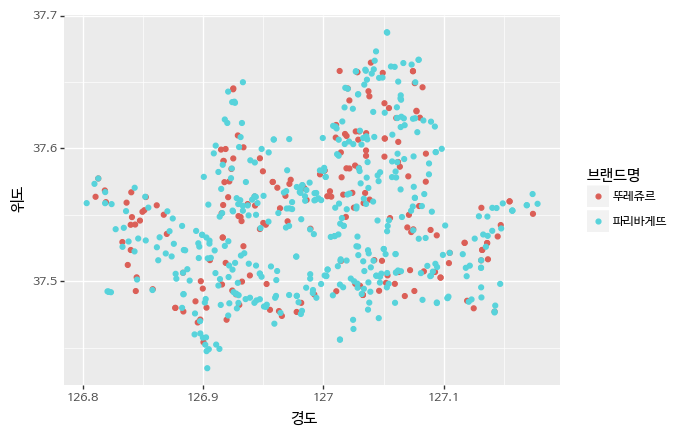

<ggplot: (-9223372036562532187)>

In [50]:
(ggplot(df_bread)
 + aes(x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family='NanumBarunGothic'))
 + scale_fill_gradient(low = 'blue', high = 'green') 
)

In [51]:
geo_df = df_bread.copy()

# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
# 우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    folium.Marker([geo_df['위도'][n], geo_df['경도'][n]], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [52]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '뚜레쥬르' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
      
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.features.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## 스타벅스, 이디야 위치 분석
* [[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'](http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015)

In [53]:
df_seoul.loc[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '상호명'].shape

(438,)

In [54]:
df_seoul.loc[df_seoul['상호명'].str.contains('이디야|ediya|EDIYA'), '상호명'].shape

(452,)

In [55]:
df_cafe = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS|이디야|ediya|EDIYA')]
df_cafe.shape

(890, 39)

In [56]:
df_cafe.loc[df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '스타벅스'

In [57]:
# df_cafe.loc[~df_cafe['상호명'].str.contains('스타벅스|starbucks|STARBUCKS'), '브랜드명'] = '이디야'

In [58]:
df_cafe['브랜드명'] = df_cafe['브랜드명'].fillna('이디야')

In [59]:
df_cafe.loc[df_cafe['브랜드명'].isnull(), '상호명'].head()

Series([], Name: 상호명, dtype: object)

In [60]:
df_cafe[['상호명','브랜드명']].head()

상호명  브랜드명
1492                 이디야커피   이디야
1682             스타벅스종로3가점  스타벅스
2419                 이디야커피   이디야
7271   이디야커피중계롯데우성점중계롯데우성점   이디야
12008                이디야커피   이디야

In [61]:
df_cafe['브랜드명'].value_counts()

이디야     452
스타벅스    438
Name: 브랜드명, dtype: int64

In [62]:
geo_df = df_cafe

In [63]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
      
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker  
    folium.features.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

## 구별 브랜드별 점포수

In [64]:
df_cafe_brand = pd.DataFrame(
    df_cafe.groupby(['시군구명', '브랜드명'])['상호명'].count()
).reset_index()
df_cafe_brand.columns = ['구', '브랜드명', '매장수']
df_cafe_brand

구  브랜드명  매장수
0    강남구  스타벅스   69
1    강남구   이디야   32
2    강동구  스타벅스   10
3    강동구   이디야   12
4    강북구  스타벅스    5
5    강북구   이디야   12
6    강서구  스타벅스   14
7    강서구   이디야   34
8    관악구  스타벅스    9
9    관악구   이디야   23
10   광진구  스타벅스   14
11   광진구   이디야   13
12   구로구  스타벅스   11
13   구로구   이디야   21
14   금천구  스타벅스    9
15   금천구   이디야   10
16   노원구  스타벅스    9
17   노원구   이디야   30
18   도봉구  스타벅스    1
19   도봉구   이디야    9
20  동대문구  스타벅스    8
21  동대문구   이디야   18
22   동작구  스타벅스    7
23   동작구   이디야   10
24   마포구  스타벅스   29
25   마포구   이디야   20
26  서대문구  스타벅스   17
27  서대문구   이디야   11
28   서초구  스타벅스   43
29   서초구   이디야   19
30   성동구  스타벅스    6
31   성동구   이디야   17
32   성북구  스타벅스   13
33   성북구   이디야   21
34   송파구  스타벅스   26
35   송파구   이디야   28
36   양천구  스타벅스    9
37   양천구   이디야   16
38  영등포구  스타벅스   26
39  영등포구   이디야   25
40   용산구  스타벅스   17
41   용산구   이디야   10
42   은평구  스타벅스    9
43   은평구   이디야   19
44   종로구  스타벅스   28
45   종로구   이디야   14
46    중구  스타벅스   43
47    중구   이디야   20
48   중랑구  스타벅스    6
49   중랑구   이디야    8

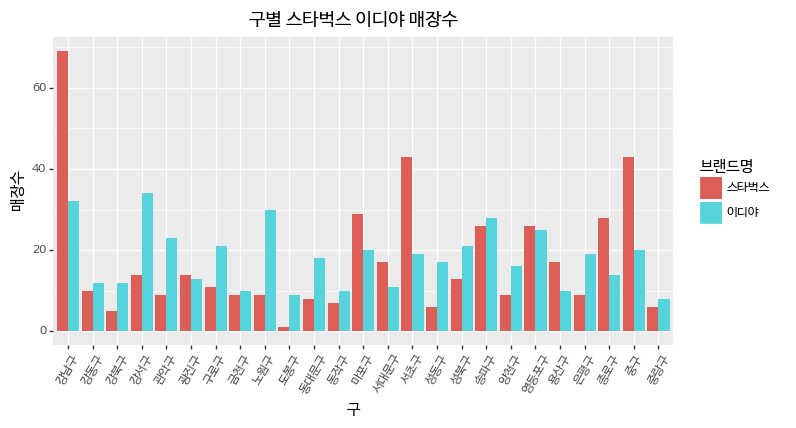

<ggplot: (-9223372036551298023)>

In [65]:
(ggplot(df_cafe_brand)
 + aes(x='구', y='매장수', fill='브랜드명')
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('구별 스타벅스 이디야 매장수')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60), 
        figure_size=(8, 4))
)

In [66]:
df_cafe.groupby(['시군구명'])['상호명'].count()

시군구명
강남구     101
강동구      22
강북구      17
강서구      48
관악구      32
광진구      27
구로구      32
금천구      19
노원구      39
도봉구      10
동대문구     26
동작구      17
마포구      49
서대문구     28
서초구      62
성동구      23
성북구      34
송파구      54
양천구      25
영등포구     51
용산구      27
은평구      28
종로구      42
중구       63
중랑구      14
Name: 상호명, dtype: int64

In [67]:
df_cafe_gu = pd.DataFrame(df_cafe.groupby(['시군구명'])['상호명'].count())
df_cafe_gu.head()

상호명
시군구명     
강남구   101
강동구    22
강북구    17
강서구    48
관악구    32

## choropleth 그리기

* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)

In [68]:
import json

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

### 스타벅스 이디야 카페 매장 합계 분포

In [69]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_cafe_gu['상호명'],
               columns = [df_cafe_brand.index, df_cafe_gu['상호명']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
    
    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker   
    folium.features.CircleMarker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

map

### 스타벅스 매장 분포

In [70]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '스타벅스']
df_cafe_starbucks = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_starbucks.columns = ['매장수']
df_cafe_starbucks.head()

매장수
시군구명     
강남구    69
강동구    10
강북구     5
강서구    14
관악구     9

In [71]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_starbucks['매장수'],
               columns = [df_cafe_starbucks.index, df_cafe_starbucks['매장수']],
               fill_color = 'YlGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'    

            
        # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
        folium.features.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

### 이디야 매장 분포

In [72]:
df_cafe_temp = df_cafe[df_cafe['브랜드명'] == '이디야']
df_cafe_ediya = pd.DataFrame(df_cafe_temp.groupby(['시군구명'])['상호명'].count())
df_cafe_ediya.columns = ['매장수']
df_cafe_ediya.head()

매장수
시군구명     
강남구    32
강동구    12
강북구    12
강서구    34
관악구    23

In [73]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_ediya['매장수'],
               columns = [df_cafe_ediya.index, df_cafe_ediya['매장수']],
               fill_color = 'PuBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df.loc[n, '브랜드명'] == '이디야' :
        icon_color = 'blue'    

            
        # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
        folium.features.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= icon_color,
            fill=True,
            fill_color=icon_color
        ).add_to(map)


map

## 매장수 크기를 반영해 CircleMaker 그리기
### Pandas 의 reshaping data 활용하기

<img src="https://i.imgur.com/IIhU0nF.png">

* 출처 : https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf
* reshaping 관련 문서 : https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [74]:
df_cafe_brand.head()

구  브랜드명  매장수
0  강남구  스타벅스   69
1  강남구   이디야   32
2  강동구  스타벅스   10
3  강동구   이디야   12
4  강북구  스타벅스    5

In [75]:
df_cafe_brand_vs = df_cafe_brand.pivot_table(index='구',
                                             columns='브랜드명',
                                             values='매장수')
df_cafe_brand_vs.columns = ['스타벅스', '이디야']
df_cafe_brand_vs.head()

스타벅스  이디야
구             
강남구    69   32
강동구    10   12
강북구     5   12
강서구    14   34
관악구     9   23

In [76]:
df_cafe_brand_vs['매장수비교'] = df_cafe_brand_vs.apply( \
    lambda x : 1 if x['스타벅스'] > x['이디야'] else 0, axis=1)
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교
구                    
강남구    69   32      1
강동구    10   12      0
강북구     5   12      0
강서구    14   34      0
관악구     9   23      0

In [77]:
lng_list = []
lat_list = []
for gu in df_cafe_brand_vs.index:
    lat = df_cafe.loc[df_cafe['시군구명'] == gu, '위도'].mean()
    lng = df_cafe.loc[df_cafe['시군구명'] == gu, '경도'].mean()
    lat_list.append(lat)
    lng_list.append(lng)
    
df_cafe_brand_vs['위도'] = lat_list
df_cafe_brand_vs['경도'] = lng_list
df_cafe_brand_vs.head()

스타벅스  이디야  매장수비교         위도          경도
구                                           
강남구    69   32      1  37.506968  127.044551
강동구    10   12      0  37.540750  127.137271
강북구     5   12      0  37.632347  127.022071
강서구    14   34      0  37.554969  126.839652
관악구     9   23      0  37.481530  126.934320

In [78]:
# CircleMarker의 radius 지정시 다음과 같은 타입오류가 나서 float type 으로 변경
# TypeError: Object of type 'int64' is not JSON serializable

df_cafe_brand_vs['스타벅스'] = df_cafe_brand_vs['스타벅스'].astype(float)
df_cafe_brand_vs['이디야'] = df_cafe_brand_vs['이디야'].astype(float)
df_cafe_brand_vs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 5 columns):
스타벅스     25 non-null float64
이디야      25 non-null float64
매장수비교    25 non-null int64
위도       25 non-null float64
경도       25 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.2+ KB


In [79]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_json,
               data = df_cafe_brand_vs['매장수비교'],
               columns = [df_cafe_brand_vs.index, 
                          df_cafe_brand_vs['매장수비교']],
               fill_color = 'BuGn',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for gu in df_cafe_brand_vs.index:
        
    for cafe in ['스타벅스', '이디야']:
        
        cafe_count = df_cafe_brand_vs.loc[gu, cafe]
        msg = f'{gu} {cafe} 매장수 : {cafe_count:.0f}'
        
        icon_color = 'blue'
        if cafe == '스타벅스': 
            icon_color = 'green'
        
        folium.features.CircleMarker(
            location = [df_cafe_brand_vs.loc[gu,'위도'], 
                      df_cafe_brand_vs.loc[gu, '경도']],
            radius = cafe_count,
            color = icon_color,
            popup = msg,
            fill = True,
            fill_color = icon_color
        ).add_to(map)

map

#### 지도 출력 시 색상 참고
* http://colorbrewer2.org/

## folium 공부를 위해 더 읽어보면 좋을 것 
* https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps
* [PinkWink의 데이터 사이언스 관련 책 - 파이썬으로 데이터 주무르기](https://pinkwink.kr/1070)

## 카토그램 
* [총선⑫ 인구 비례로 본 당선 지도…‘카토그램’으로 살펴본 당선 현황 > 데이터룸 > 정치 > 뉴스 | KBSNEWS](http://news.kbs.co.kr/news/view.do?ncd=3264019)
* [The Housing Value of Every County in the U.S. - Metrocosm](http://metrocosm.com/the-housing-value-of-every-county-in-the-u-s/)